<a href="https://colab.research.google.com/github/melissajblins/ModelagemComputacionalNetPyNE/blob/main/Tutorial_netpyne_UFABC_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minicurso - Modelagem Computacional em NetPyNE usando Google Cloud Platform
Minicurso Simpósio do PPGNCG, Linguagem Python - 2021

## Simulando neurônios e sinapses

### Links
[NetPyNE](http://www.netpyne.org/gui)

[NetPyNE Tutorial](http://www.netpyne.org/tutorial.html)

[Neuron](https://neuron.yale.edu/neuron/)

### Pacotes
- Neuron - Neurosimulador
- NetPyne - Interface em Python para o Neuron

### Rotina
1. Passar os parâmetros da célula, isto é, sua configuração geométrica.
2. Criar uma população.
3. Conectar as células com mecanismo sináptico - excitatório nesse caso.
4. Interessante criar um estímulo extra (background).
5. Regras de conectividade.
6. Configurar a simulação.

In [11]:
!pip install neuron
!pip install netpyne


Start time:  2021-12-15 20:52:28.747235

Creating network of 2 cell populations on 1 hosts...
  Number of cells on node 0: 40 
  Done; cell creation time = 0.01 s.
Making connections...
  Number of connections on node 0: 203 
  Done; cell connection time = 0.02 s.
Adding stims...
  Number of stims on node 0: 40 
  Done; cell stims creation time = 0.01 s.
Recording 1 traces of 1 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 1.21 s; real-time ratio: 0.83.

Gathering data...
  Done; gather time = 0.05 s.

Analyzing...
  Cells: 40
  Connections: 243 (6.08 per cell)
  Spikes: 919 (22.98 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 1.21 s
  Done; saving time = 0.02 s.
Plotting raster...


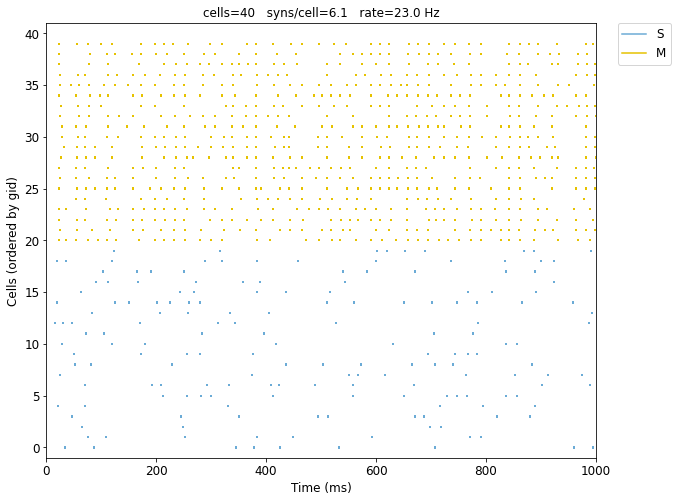

Plotting recorded cell traces ... cell


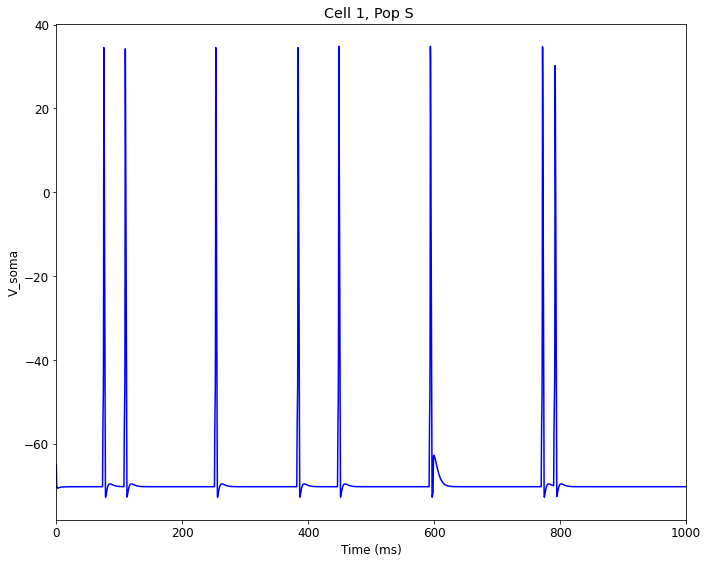

Plotting firing rate spectrogram ...


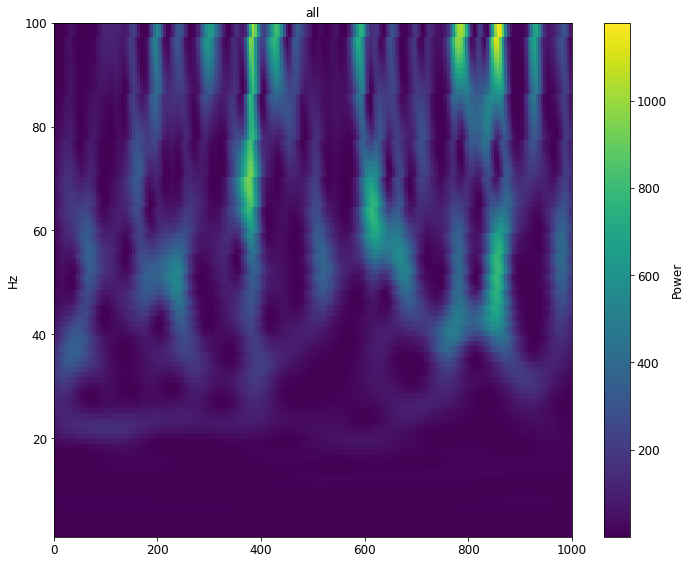

  Done; plotting time = 1.41 s

Total time = 2.73 s

End time:  2021-12-15 20:52:31.478379


In [12]:
from netpyne import specs, sim
import matplotlib

%matplotlib inline

# Parâmetros da rede
netParams = specs.NetParams()  # objeto da classe NetParams para armazenar os parâmetros da rede

## Parâmetros/Regras da célula
PYRcell = {'secs': {}}
PYRcell['secs']['soma'] = {'geom': {}, 'mechs': {}}
PYRcell['secs']['soma']['geom'] = {
    'diam': 18.8,   
    'L': 18.8, 
    'Ra': 123.0}  # geometria do soma
PYRcell['secs']['soma']['mechs']['hh'] = {
    'gnabar': 0.12, 
    'gkbar': 0.036, 
    'gl': 0.003, 
    'el': -70}  # mecanismo hh do soma
netParams.cellParams['PYR'] = PYRcell

## Parâmetros da população
netParams.popParams['S'] = {
    'cellType': 'PYR', 
    'numCells': 20}
netParams.popParams['M'] = {
    'cellType': 'PYR', 
    'numCells': 20}

## Prâmetros do mecanismo sináptico
netParams.synMechParams['exc'] = {
    'mod': 'Exp2Syn', 
    'tau1': 0.1, 
    'tau2': 5.0, 
    'e': 0}  # mecanismo sináptico excitatório

# Parâmetros da Estimulação
netParams.stimSourceParams['bkg'] = {
    'type': 'NetStim', 
    'rate': 10, #Hz
    'noise': 1.0} #Totalmente aleatório
netParams.stimTargetParams['bkg->PYR'] = {
    'source': 'bkg', 
    'conds': {'cellType': 'PYR'}, 
    'weight': 0.01, 
    'delay': 5, 
    'synMech': 'exc'}

## Regras de conectividade da célula
netParams.connParams['S->M'] = {    # S -> M label
    'preConds': {'pop': 'S'},       # condições das células pre-sinápticas
    'postConds': {'pop': 'M'},      # condições das células pós-sinápticas
    'probability': 0.5,             # probabilidade de conexão
    'weight': 0.01,                 # peso sináptico
    'delay': 5,                     # delay da transmissão (ms)
    'synMech': 'exc'}               # mecanismo sináptico


# Opções da simulação
simConfig = specs.SimConfig()       # objeto da classe SimConfig para armazenar a configuração da simulação

simConfig.duration = 1*1e3          # Duração da simulação, em ms
simConfig.dt = 0.025                # Tempo de integração // Internal integration timestep to use
simConfig.verbose = False           # Mostrar menssagens detalhadas
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dicionário para registrar os traços (simulação do potencial de membrana)
simConfig.recordStep = 0.1          # Tamanho do passo em ms para salvar dados (exemplo: potencial de membrana V, LFP, etc)
simConfig.filename = 'tut1'         # Nome da saída do conjunto de arquivos
simConfig.savePickle = False        # Salvar parâmetros, rede e saída da simulação em um arquivo pickle
simConfig.saveJson = False

simConfig.analysis['plotRaster'] = {'saveFig': True}                  # Plotar um raster
simConfig.analysis['plotTraces'] = {'include': [1], 'saveFig': True}  # Plotar o registro do potencial de membrana para esta lista de células
simConfig.analysis['plotRateSpectrogram'] = {'include': ['all']}      # Plotar um espectrograma


# Cria a rede e roda a simulação
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)

In [13]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Atividades

1) Renomeie (abaixo) a população 'M' para população 'I' (população inibitória)

2) Mude a conexção S->M para S->I (você precisa mudar ambos os rótulos e as condições!)

3) Aumente a taxa da entrada de fundo ('bkg') para 50 Hz e foque apenas a população 'S': `'conds': {'pop': 'S'}`

4) Adicione um histograma dos spikes: `simConfig.analysis['plotSpikeHist'] = {'include': ['S', 'I']}`

6) Rode a simulação do modelo


5) Adicione uma nova sinapse inibitória chamada 'inh' com as mesmas propriedades que a 'exc', exceto pelo equilíbrio de potencial = -70 

7) Adicione uma conexão I->S com probabilidade: 0.7, peso: 0.02, delay: 5, synMech: 'inh'

10) Compare a sincronia: adicionando `'syncLines':True` ao plotRaster

11) Modifique os parâmetros (peso, probabilidade, delay, tau2,…) para atingir diferentes níveis de sincronia e frequências de oscilação

12) Abra a interface (netpyne.org/gui). Copie e cole o código no ipython notebook place e adicione: 

`netpyne_geppetto.netParams = netParams`

`netpyne_geppetto.simConfig = simConfig`




Start time:  2021-12-15 20:54:17.351894

Creating network of 2 cell populations on 1 hosts...
  Number of cells on node 0: 40 
  Done; cell creation time = 0.00 s.
Making connections...
  Number of connections on node 0: 482 
  Done; cell connection time = 0.05 s.
Adding stims...
  Number of stims on node 0: 20 
  Done; cell stims creation time = 0.00 s.
Recording 2 traces of 1 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 1.41 s; real-time ratio: 0.71.

Gathering data...
  Done; gather time = 0.03 s.

Analyzing...
  Cells: 40
  Connections: 502 (12.55 per cell)
  Spikes: 984 (24.60 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 1.41 s
  Done; saving time = 0.01 s.
Plotting raster...


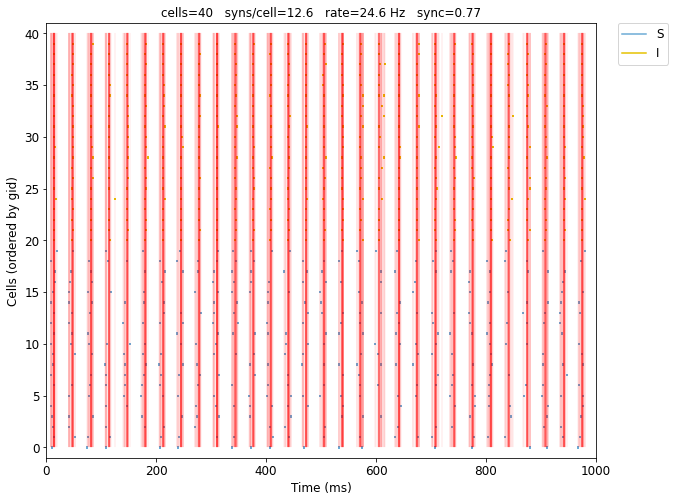

Plotting recorded cell traces ... cell


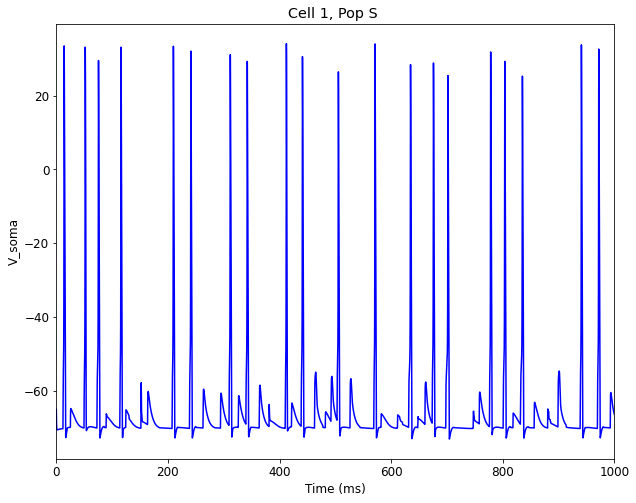

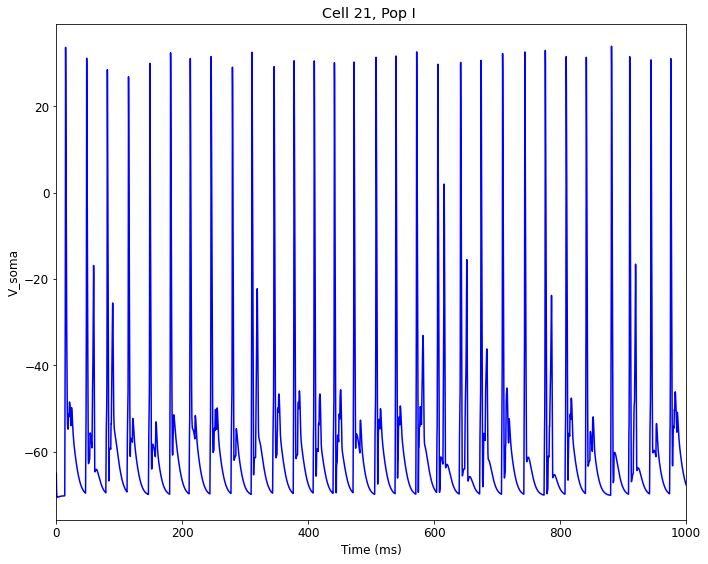

Plotting firing rate spectrogram ...


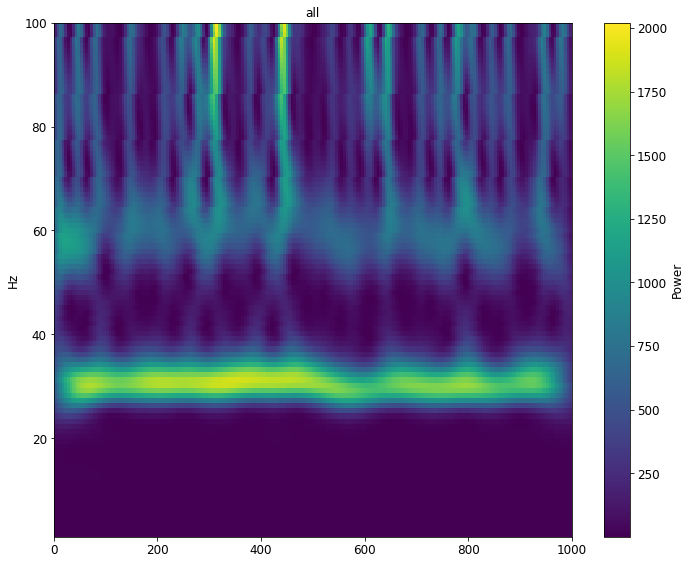

Plotting spike histogram...


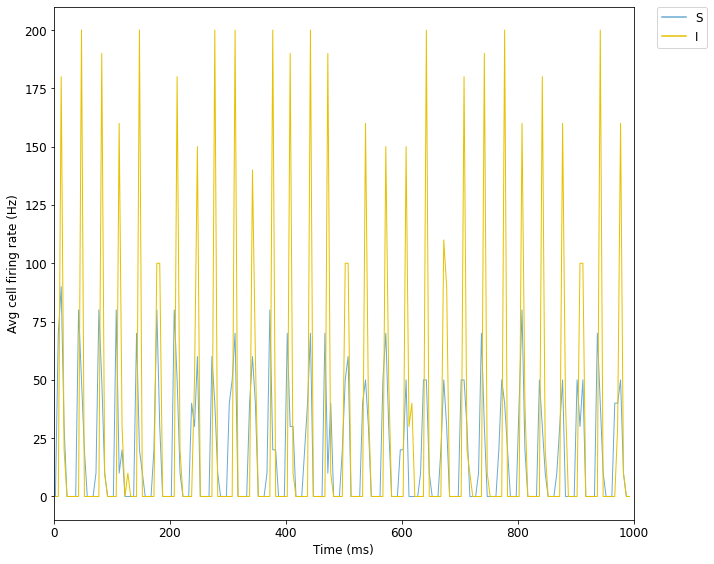

  Done; plotting time = 3.66 s

Total time = 5.19 s

End time:  2021-12-15 20:54:22.546186


In [14]:
from netpyne import specs, sim

%matplotlib inline

# Parâmetros da rede
netParams = specs.NetParams()  # objeto da classe NetParams para armazenar os parâmetros de rede

## Parâmetros/Regras da célula
PYRcell = {'secs': {}}
PYRcell['secs']['soma'] = {'geom': {}, 'mechs': {}}
PYRcell['secs']['soma']['geom'] = {
    'diam': 18.8,   
    'L': 18.8, 
    'Ra': 123.0}  # geometria do soma
PYRcell['secs']['soma']['mechs']['hh'] = {
    'gnabar': 0.12, 
    'gkbar': 0.036, 
    'gl': 0.003, 
    'el': -70}  # mecanismo hh do soma
netParams.cellParams['PYR'] = PYRcell

## Parâmetros da população
netParams.popParams['S'] = {
    'cellType': 'PYR', 
    'numCells': 20}
netParams.popParams['I'] = {
    'cellType': 'PYR', 
    'numCells': 20}

## Parâmetros do mecanismo sináptico
# Mecanismo sináptico excitatório
netParams.synMechParams['exc'] = {
    'mod': 'Exp2Syn', 
    'tau1': 0.1, 
    'tau2': 5.0, 
    'e': 0}  

# Mecanismo sináptico inibitório
netParams.synMechParams['inh'] = {
  'mod': 'Exp2Syn', 
  'tau1': 0.1, 
  'tau2': 5.0, 
  'e': -70}


# Parâmetros da estimulação
netParams.stimSourceParams['bkg'] = {
    'type': 'NetStim', 
    'rate': 50, 
    'noise': 0.5}
netParams.stimTargetParams['bkg->PYR'] = {
    'source': 'bkg', 
    'conds': {'pop': 'S'}, 
    'weight': 0.01, 
    'delay': 5, 
    'synMech': 'exc'}

## Regras da conectividade da célula
# Excitatório
netParams.connParams['S-> I'] = {    # S -> M label
    'preConds': {'pop': 'S'},       # condições das células pre-sinápticas
    'postConds': {'pop': 'I'},      # condições das células pós-sinápticas
    'probability': 0.5,               # probabilidade de conexão
    'weight': 0.01,                 # peso sináptico
    'delay': 5,                     # delay da transmissão (ms)
    'synMech': 'exc'}               # mecanismo sináptico

# Inibitório
netParams.connParams['I-> S'] = {    # I-> Slabel
    'preConds': {'pop': 'I'},       # condições das células pre-sinápticas
    'postConds': {'pop': 'S'},      # condições das células pós-sinápticas
    'probability': 0.7,               # probabilidade de conexão
    'weight': 0.02,                 # peso sináptico
    'delay': 5,                     # delay da transmissão (ms)
    'synMech': 'inh'}               # mecanismo sináptico

# Opções da simulação
simConfig = specs.SimConfig()       # objeto da classe SimConfig para armazenar a configuração da simulação

simConfig.duration = 1*1e3          # Duração da simulação, em ms
simConfig.dt = 0.025                # Tempo de integração // Internal integration timestep to use
simConfig.verbose = False           # Mostrar menssagens detalhadas
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dicionário para registrar os traços (simulação do potencial de membrana)
simConfig.recordStep = 0.1          # Tamanho do passo em ms para salvar dados (exemplo: potencial de membrana V, LFP, etc)
simConfig.filename = 'tut1'         # Nome da saída do conjunto de arquivos
simConfig.savePickle = False        # Salvar parâmetros, rede e saída da simulação em um arquivo pickle
simConfig.saveJson = False

simConfig.analysis['plotRaster'] = {'saveFig': True, 'syncLines':True}    # Plotar um raster
simConfig.analysis['plotTraces'] = {'include': [1, 21], 'saveFig': True}  # Plotar o registro do potencial de membrana para esta lista de células
simConfig.analysis['plotRateSpectrogram'] = {'include': ['all']}      # Plotar um espectrograma
simConfig.analysis['plotSpikeHist'] = {'include': ['S', 'I']}         # Plotar um histograma dos spikes

# Cria a rede e roda a simulação
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)

### Modelo mais detalhado de uma rede neuronal até hoje
https://www.cell.com/fulltext/S0092-8674%2815%2901191-5

In [15]:
!git clone https://github.com/suny-downstate-medical-center/S1_netpyne.git

Cloning into 'S1_netpyne'...
remote: Enumerating objects: 50571, done.
remote: Counting objects: 100% (6603/6603), done.
remote: Compressing objects: 100% (4442/4442), done.
remote: Total 50571 (delta 2164), reused 6597 (delta 2158), pack-reused 43968
Receiving objects: 100% (50571/50571), 4.45 GiB | 19.66 MiB/s, done.
Resolving deltas: 100% (10167/10167), done.
Checking out files: 100% (39916/39916), done.
